In [147]:
#Importation des bibliothèques

import pandas as pd
from scipy.stats import f_oneway, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [135]:
#Lecture du dataset
data = pd.read_csv('german_credit_data.csv')
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [136]:
col = [vals for vals in data.columns if data[vals].dtype=='int64']
col

['Unnamed: 0', 'Age', 'Job', 'Credit amount', 'Duration']

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Job'}>,
        <AxesSubplot:title={'center':'Credit amount'}>],
       [<AxesSubplot:title={'center':'Duration'}>, <AxesSubplot:>]],
      dtype=object)

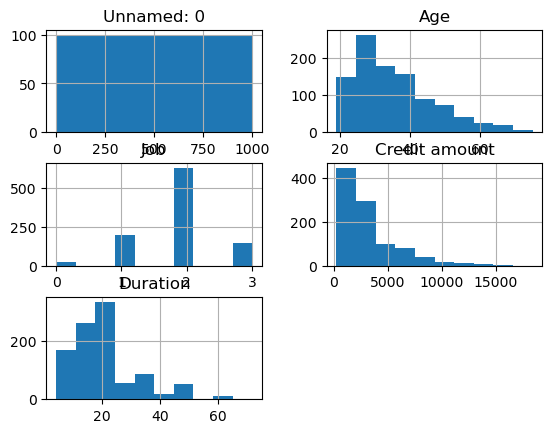

In [137]:
data.hist()

In [138]:
from scipy.stats import shapiro

for val in col:
    stat, p = shapiro(data[val])
    print(f"Statistique: {stat}, p-valeur: {p}")
    if p > 0.05:
        print("Les données suivent une distribution normale.")
    else:
        print("Les données ne suivent pas une distribution normale.")


Statistique: 0.9548090258354325, p-valeur: 5.3886784828402395e-17
Les données ne suivent pas une distribution normale.
Statistique: 0.917471229910265, p-valeur: 6.382098308916094e-23
Les données ne suivent pas une distribution normale.
Statistique: 0.7913193507483941, p-valeur: 6.370729666061856e-34
Les données ne suivent pas une distribution normale.
Statistique: 0.7933961638083256, p-valeur: 8.608545621331088e-34
Les données ne suivent pas une distribution normale.
Statistique: 0.8997879376569183, p-valeur: 4.906432642671475e-25
Les données ne suivent pas une distribution normale.


In [139]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

col = [vals for vals in data.columns if data[vals].dtype=='int64']

for val in col:
    data[val] = scaler.fit_transform(data[[val]])
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0.000000,0.857143,male,0.666667,own,NaN,little,0.050567,0.029412,radio/TV,good
1,0.001001,0.053571,female,0.666667,own,little,moderate,0.313690,0.647059,radio/TV,bad
2,0.002002,0.535714,male,0.333333,own,little,NaN,0.101574,0.117647,education,good
3,0.003003,0.464286,male,0.666667,free,little,little,0.419941,0.558824,furniture/equipment,good
4,0.004004,0.607143,male,0.666667,free,little,little,0.254209,0.294118,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,0.995996,0.214286,female,0.333333,own,little,NaN,0.081765,0.117647,furniture/equipment,good
996,0.996997,0.375000,male,1.000000,own,little,little,0.198470,0.382353,car,good
997,0.997998,0.339286,male,0.666667,own,little,NaN,0.030483,0.117647,radio/TV,good
998,0.998999,0.071429,male,0.666667,free,little,little,0.087763,0.602941,radio/TV,bad


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Job'}>,
        <AxesSubplot:title={'center':'Credit amount'}>],
       [<AxesSubplot:title={'center':'Duration'}>, <AxesSubplot:>]],
      dtype=object)

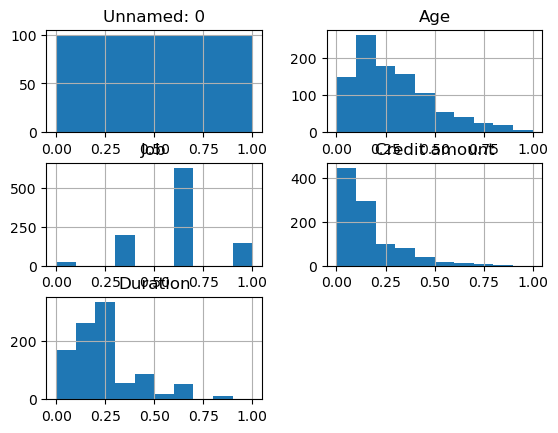

In [140]:
data.hist()

In [143]:
from scipy.stats import shapiro

for val in col:
    stat, p = shapiro(data[val])
    print(f"Statistique: {stat}, p-valeur: {p}")
    if p > 0.05:
        print("Les données suivent une distribution normale.")
    else:
        print("Les données ne suivent pas une distribution normale.")

Statistique: 0.9548090258354325, p-valeur: 5.3886784828402395e-17
Les données ne suivent pas une distribution normale.
Statistique: 0.917471229910265, p-valeur: 6.382098308916094e-23
Les données ne suivent pas une distribution normale.
Statistique: 0.7913193507483941, p-valeur: 6.370729666061856e-34
Les données ne suivent pas une distribution normale.
Statistique: 0.7933961638083259, p-valeur: 8.608545621331579e-34
Les données ne suivent pas une distribution normale.
Statistique: 0.8997879376569178, p-valeur: 4.906432642670665e-25
Les données ne suivent pas une distribution normale.


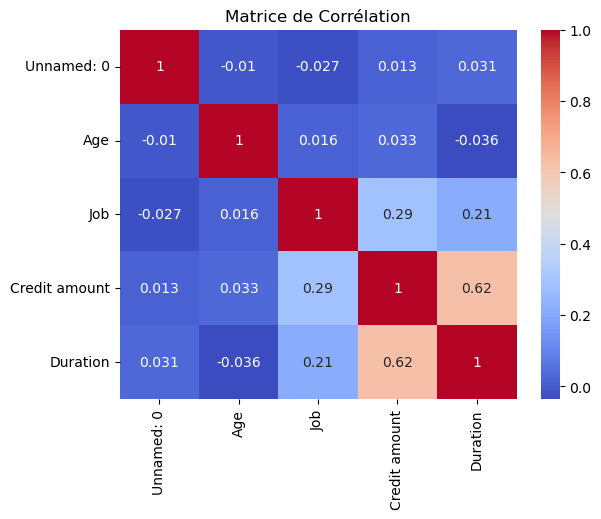

In [144]:
# Matrice de corrélation
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de Corrélation")
plt.show()

In [97]:
# Exploration initiale
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None
        Unnamed: 0          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436   

In [98]:
categorical_columns = [col for col in data.drop('Risk', axis = 1).columns if data[col].dtype == 'object']

# Créer une table de contingence
for value in categorical_columns:
    contingency_table = pd.crosstab(data[value], data['Risk'])
    print("Table de contingence:\n", contingency_table)

    # Test Chi-square
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print("\nStatistique Chi²:", chi2)
    print("P-value:", p_value)
    print("Degrés de liberté:", dof)
    print("Fréquences attendues:\n", expected)

    # Interprétation
    if p_value < 0.05:
        print("Il existe une association significative entre ", value," et le statut de crédit.")
    else:
        print("Aucune association significative entre ", value," et le statut de crédit.")
    print("=================================================================================================")

Table de contingence:
 Risk    bad  good
Sex              
female  109   201
male    191   499

Statistique Chi²: 5.348516218081436
P-value: 0.020739913068713305
Degrés de liberté: 1
Fréquences attendues:
 [[ 93. 217.]
 [207. 483.]]
Il existe une association significative entre  Sex  et le statut de crédit.
Table de contingence:
 Risk     bad  good
Housing           
free      44    64
own      186   527
rent      70   109

Statistique Chi²: 18.19984158256362
P-value: 0.00011167465374597686
Degrés de liberté: 2
Fréquences attendues:
 [[ 32.4  75.6]
 [213.9 499.1]
 [ 53.7 125.3]]
Il existe une association significative entre  Housing  et le statut de crédit.
Table de contingence:
 Risk             bad  good
Saving accounts           
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42

Statistique Chi²: 18.479089902588285
P-value: 0.00035029499291971256
Degrés de liberté: 3
Fréquences attendues:
 [[197.80171359 405.19828641]
 [ 33.

In [99]:
for val in categorical_columns + ['Risk']:
    enc = LabelEncoder()
    data[val] = enc.fit_transform(data[val])
    
    mapping = dict(zip(enc.classes_, enc.transform(enc.classes_)))
    print(f"Mapping of {val}:", mapping)

Mapping of Sex: {'female': 0, 'male': 1}
Mapping of Housing: {'free': 0, 'own': 1, 'rent': 2}
Mapping of Saving accounts: {'little': 0, 'moderate': 1, 'quite rich': 2, 'rich': 3, nan: 4}
Mapping of Checking account: {'little': 0, 'moderate': 1, 'rich': 2, nan: 3}
Mapping of Purpose: {'business': 0, 'car': 1, 'domestic appliances': 2, 'education': 3, 'furniture/equipment': 4, 'radio/TV': 5, 'repairs': 6, 'vacation/others': 7}
Mapping of Risk: {'bad': 0, 'good': 1}


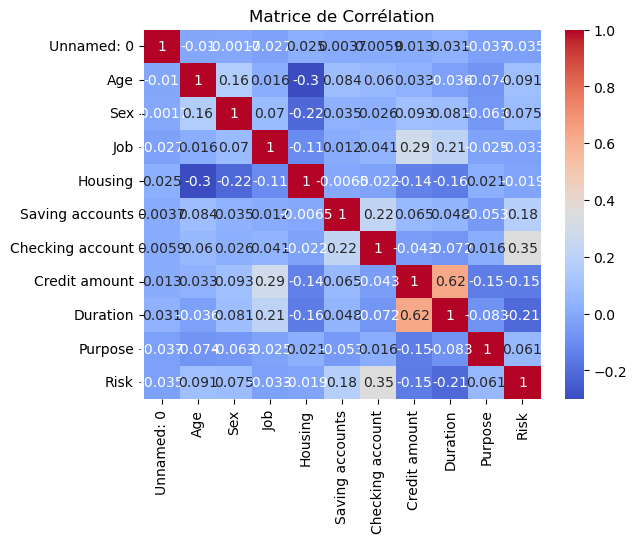

In [100]:
# Matrice de corrélation
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de Corrélation")
plt.show()

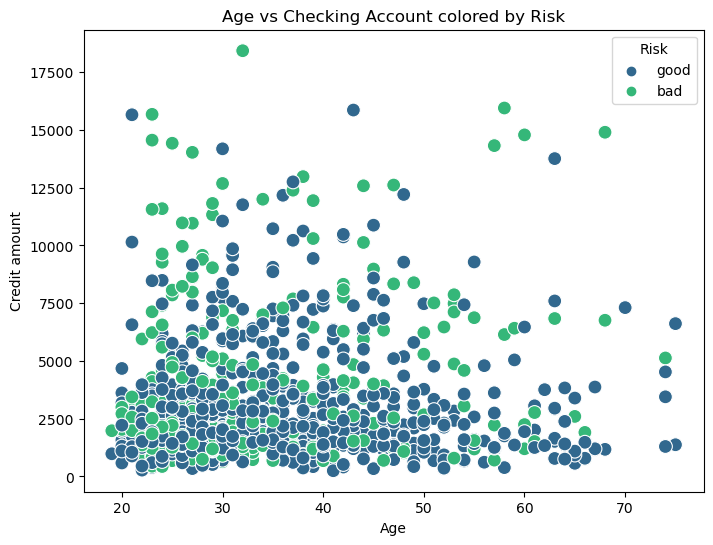

In [107]:
#Scatter Plot to visualize the data 

# Scatter plot: Credit Amount vs Age colored by Risk
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Credit amount', hue='Risk', data=data, palette='viridis', s=100)
plt.title('Age vs Checking Account colored by Risk')
plt.xlabel('Age')
plt.ylabel('Credit amount')
plt.legend(title='Risk')
plt.show()

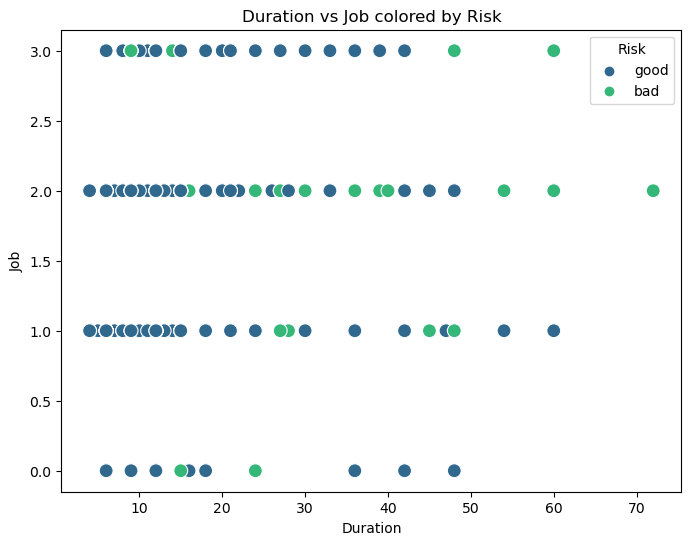

In [110]:
#Scatter Plot to visualize the data 

# Scatter plot: Duration vs Job colored by Risk
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Duration', y='Job', hue='Risk', data=data, palette='viridis', s=100)
plt.title('Duration vs Job colored by Risk')
plt.xlabel('Duration')
plt.ylabel('Job')
plt.legend(title='Risk')
plt.show()

## Préparation des données :

### *Traiter les valeurs manquantes et normaliser les données numériques.*
### *Encoder les variables catégorielles avec OneHotEncoder ou LabelEncoder.*

In [146]:
# Séparation des features et de la cible
X = data.drop("Risk", axis=1)
y = data["Risk"]

# Prétraitement
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(), categorical_features),
    ]
)

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Développer le modèle :

### *Tester différents modèles comme Random Forest, Logistic Regression ou XGBoost.*
### *Évaluer les performances avec des métriques comme AUC-ROC, accuracy, ou f1-score.*

In [148]:
model = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier())])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

         bad       0.67      0.37      0.48        59
        good       0.78      0.92      0.84       141

    accuracy                           0.76       200
   macro avg       0.72      0.65      0.66       200
weighted avg       0.75      0.76      0.74       200

AUC-ROC: 0.7969707897583844
